In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/heart_disease_data.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0


In [ ]:
data['target'].value_counts()

,count
target,
1,165
0,138


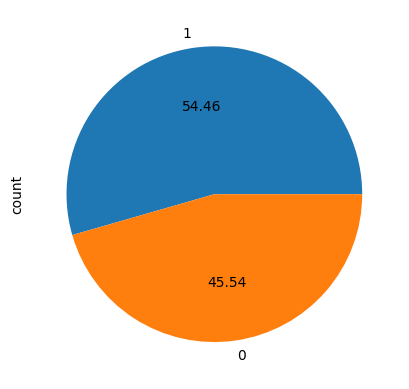

In [ ]:
data['target'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [ ]:
x=data.drop(columns = 'target',axis=1)
y=data['target']

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
[x_train,x_test,y_train,y_test]=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x_train,x_test,y_train,y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
61    54    1   1       108   309    0        1      156      0      0.0   
238   77    1   0       125   304    0        0      162      1      0.0   
160   56    1   1       120   240    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
289   55    0   0       128   205    0        2      130      1      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
100   42    1   3       148   244    0        0      178      0      0.8   
49    53    0   0       138   234    0        0      160      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
194   60    1   2       140   185    0        0      155      0      3.0   
131   49    0   1       134   271    0        1      162      0      0.0   

     slope  ca  thal  
61       2   0     3  
238      2   3     2  
160      0   0    

In [ ]:
linear_model=LogisticRegression()
linear_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_pred=linear_model.predict(x_test)
print(x_pred)

[0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1]


In [ ]:
train_data_Accuracy=round(accuracy_score(y_test,x_pred),2)
print("Accuracy on train_data",train_data_Accuracy)

test_data_precison=round(precision_score(y_test,x_pred),2)
print("Precision on test data",test_data_precison)

test_data_recall=round(recall_score(y_test,x_pred),2)
print("Recall on test data",test_data_recall)

test_data_f1=round(f1_score(y_test,x_pred),2)
print("F1 score on test data",test_data_f1)
# train_data_precision=precision_score(y_test,x_pred)
# print("Precision on training data",train_data_precision)

Accuracy on train_data 0.82
Precision on test data 0.84
Recall on test data 0.82
F1 score on test data 0.83


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,x_pred))


              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
y_test.value_counts()

,count
target,
1,33
0,28


[[23  5]
 [ 6 27]]


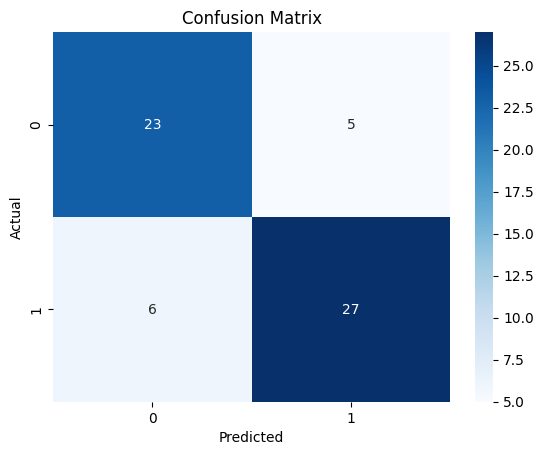

In [ ]:
cm=confusion_matrix(y_test,x_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

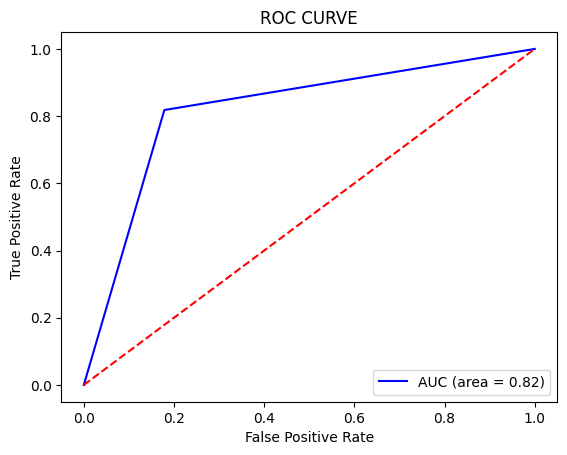

In [ ]:
#For AOC and ROC Drawn to differentiate how model accrately predict
from sklearn.metrics import roc_curve, auc
fpr,tpr, _=roc_curve(y_test,x_pred)
roc_auc=auc(fpr,tpr)

#plot AUR_ROC Curve
plt.figure()
plt.plot(fpr,tpr,color='blue',label='AUC (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='red',linestyle='dashed')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC CURVE")
plt.show()

In [ ]:
#FEED input data to model
input_data=(56,1,2,130,256,1,0,142,1,0.6,1,1,1)
#change the input data to numpy array
input_data_as_np_array=np.asarray(input_data)
input_data_reshaped=input_data_as_np_array.reshape(1,-1)


In [ ]:
#now predict on new unput on unseen data
prediction=linear_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("The person does not have heart disease")
else:
  print("The person has heart disease")

[1]
The person has heart disease
